In [ ]:
import os
os._exit(00)

In [69]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import scipy.stats as stats
import statistics
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api 
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)

## Splitting the Data

In [70]:
df1 = pd.read_csv('multivariate_eng_df.csv')
df1.drop(columns=['STATE'], inplace=True)
df1['PEOPLE_POSITIVE_NEW_CASES_COUNT'] = df1['PEOPLE_POSITIVE_NEW_CASES_COUNT'].astype(int)
df1.set_index('Date',inplace=True)
df1.sort_index(inplace=True)
df1 = df1[['PEOPLE_POSITIVE_NEW_CASES_COUNT','PROVINCE_STATE_NAME']]

In [71]:
state = 'California'

df_state = df1.loc[df1['PROVINCE_STATE_NAME'] == state]

df_state.drop(columns=['PROVINCE_STATE_NAME'], inplace = True)

df_state

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_6589/1707246595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state.drop(columns=['PROVINCE_STATE_NAME'], inplace = True)


,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,
2020-03-01,5
2020-03-02,5
2020-03-03,7
2020-03-04,10
2020-03-05,12
...,...
2022-04-25,4531
2022-04-26,16180
2022-04-27,1852


In [72]:
train_data = df_state.iloc[:632]
test_data = df_state.iloc[632:]
test_data.rename(columns={'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'PEOPLE_POSITIVE_NEW_CASES_COUNT_test'}, inplace=True)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_6589/849388845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.rename(columns={'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'PEOPLE_POSITIVE_NEW_CASES_COUNT_test'}, inplace=True)


In [73]:
test_data \
    .rename(columns={'test_data': 'TEST SET'}) \
    .join(train_data.rename(columns={'train_data': 'TRAINING SET'}), how='outer')

,PEOPLE_POSITIVE_NEW_CASES_COUNT_test,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,,
2020-03-01,NaN,5.0
2020-03-02,NaN,5.0
2020-03-03,NaN,7.0
2020-03-04,NaN,10.0
2020-03-05,NaN,12.0
...,...,...
2022-04-25,4531.0,NaN
2022-04-26,16180.0,NaN
2022-04-27,1852.0,NaN


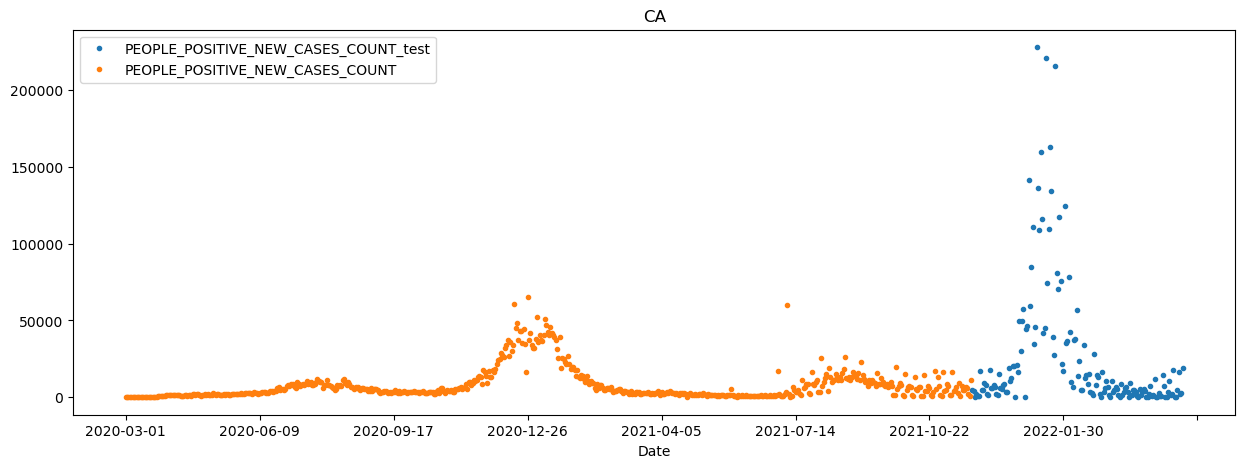

In [74]:
_ = test_data \
    .rename(columns={'test_data': 'TEST SET'}) \
    .join(train_data.rename(columns={'train_data': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='CA', style='.')

## Baseline ARIMA model

In [60]:
model=ARIMA(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(1,1,1))
model_fit=model.fit()

In [61]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     PEOPLE_POSITIVE_NEW_CASES_COUNT   No. Observations:                  632
Model:                              ARIMA(1, 1, 1)   Log Likelihood               -6190.452
Date:                             Fri, 23 Feb 2024   AIC                          12386.904
Time:                                     19:22:30   BIC                          12400.246
Sample:                                 03-01-2020   HQIC                         12392.086
                                      - 11-22-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1042      0.026     -3.977      0.000      -0.156      -0.053
ma.L1         -0.6952      0.021    -32.919      0.000      -0.737      -0.654
sigma2      2.012e+07   2.24e+05     89.716      0.000    1.97e+07    2.06e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             79317.62
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              34.85   Skew:                             4.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_6589/3755811663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['forecast']=model_fit.predict(start=600,end=790,dynamic=True)


<AxesSubplot:xlabel='Date'>

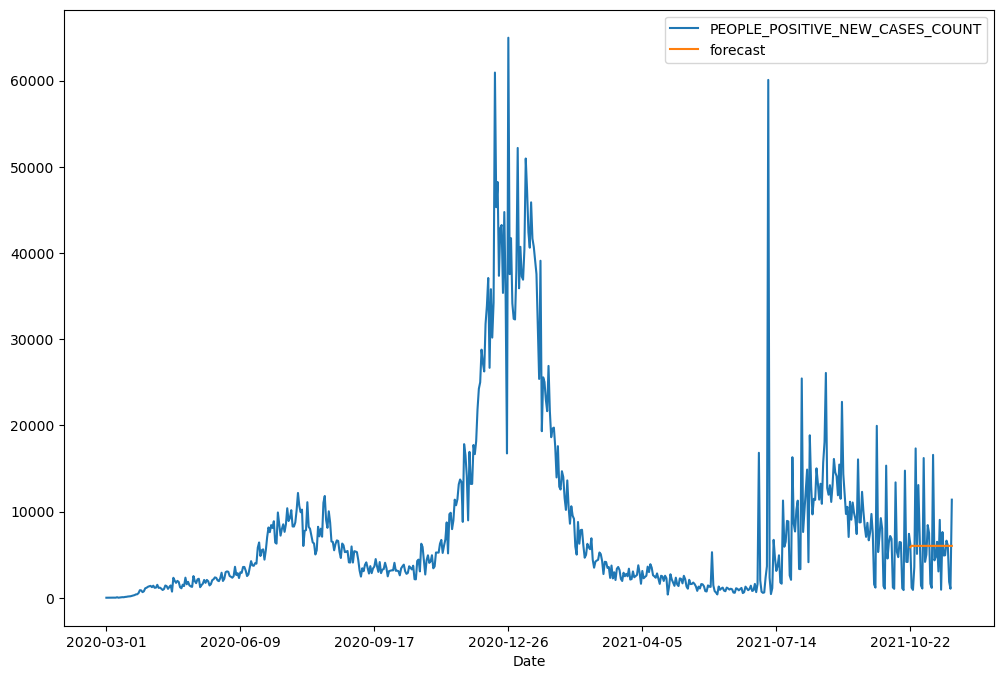

In [62]:
train_data['forecast']=model_fit.predict(start=600,end=790,dynamic=True)
train_data[['PEOPLE_POSITIVE_NEW_CASES_COUNT','forecast']].plot(figsize=(12,8))

## Grid Search

In [63]:
results=[]
for p in range(3,10):
    for q in range(3,10):
        model=ARIMA(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

KeyboardInterrupt: 

In [ ]:
model=ARIMA(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(7,1,3))
model_fit=model.fit()

In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     PEOPLE_POSITIVE_NEW_CASES_COUNT   No. Observations:                  632
Model:                              ARIMA(7, 1, 3)   Log Likelihood               -6144.402
Date:                             Fri, 23 Feb 2024   AIC                          12310.804
Time:                                     19:00:17   BIC                          12359.724
Sample:                                 03-01-2020   HQIC                         12329.804
                                      - 11-22-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0151      0.081      0.186      0.852      -0.144       0.174
ar.L2         -0.3214      0.055     -5.792      0.000      -0.430      -0.213
ar.L3          0.1755      0.062      2.838      0.005       0.054       0.297
ar.L4          0.1603      0.051      3.149      0.002       0.061       0.260
ar.L5          0.1431      0.035      4.122      0.000       0.075       0.211
ar.L6          0.1862      0.028      6.678      0.000       0.132       0.241
ar.L7          0.3600      0.023     15.565      0.000       0.315       0.405
ma.L1         -0.8396      0.082    -10.230      0.000      -1.000      -0.679
ma.L2          0.4096      0.104      3.924      0.000       0.205       0.614
ma.L3         -0.4258      0.084     -5.047      0.000      -0.591      -0.260
sigma2      1.734e+07   2.24e+05     77.551      0.000    1.69e+07    1.78e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             78334.31
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              27.74   Skew:                             4.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.13e+14. Standard errors may be unstable.
"""

In [15]:
start_point = len(train_data)
# The end point is the start point plus the length of the test dataset, minus one to adjust for zero-based indexing.
end_point = start_point + len(test_data) - 1

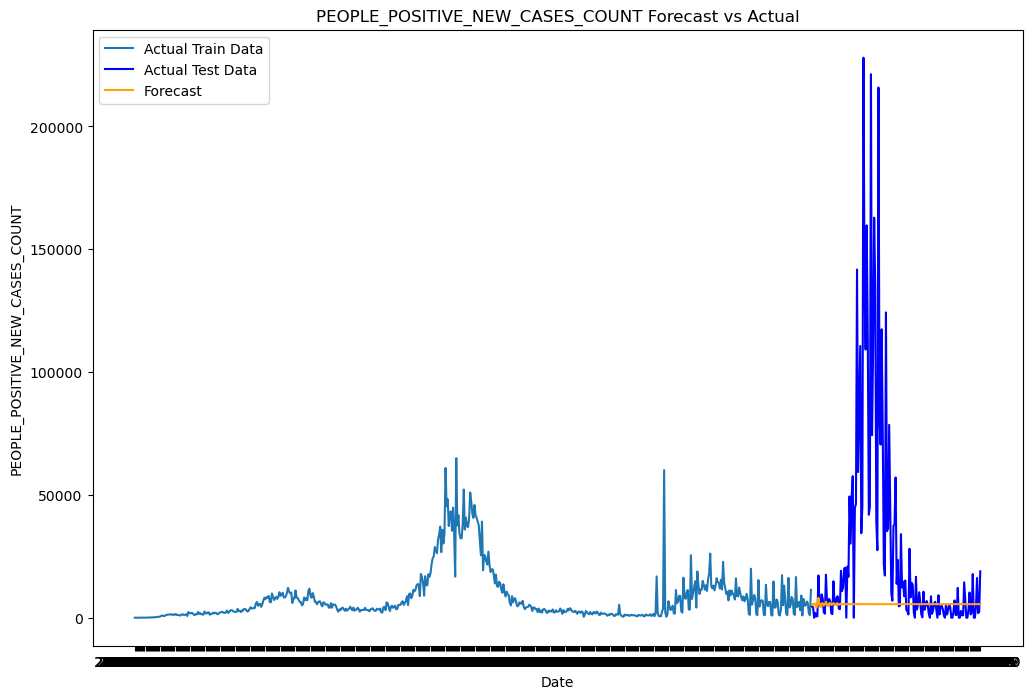

In [16]:
model = ARIMA(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'], order=(7, 1, 3))
model_fit = model.fit()

# Generate predictions for the test data period
predictions = model_fit.predict(start=start_point, end=end_point, typ='levels')

# Create a DataFrame for the predictions to align with the test_data index
forecast_data = pd.Series(predictions, index=test_data.index)

# Plotting
plt.figure(figsize=(12, 8))

# Plot historical actual values
plt.plot(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'], label='Actual Train Data')
plt.plot(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], label='Actual Test Data', color='blue')


# Plot forecasted values
plt.plot(forecast_data, label='Forecast', color='orange')

# Plot actual values from test_data for comparison

plt.title('PEOPLE_POSITIVE_NEW_CASES_COUNT Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.legend()
plt.show()

## AUTO ARIMA MODEL

In [75]:
train_data

,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,
2020-03-01,5
2020-03-02,5
2020-03-03,7
2020-03-04,10
2020-03-05,12
...,...
2021-11-18,6627
2021-11-19,6090
2021-11-20,1853


In [77]:
#train_data = train_data.drop(columns=['forecast'])
train_data.index=pd.to_datetime(df.index)
train_data

,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,
2020-03-01,5
2020-03-02,5
2020-03-03,7
2020-03-04,10
2020-03-05,12
...,...
2021-11-18,6627
2021-11-19,6090
2021-11-20,1853


In [79]:
train_data = train_data.asfreq('D')
train_data

,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,
2020-03-01,5
2020-03-02,5
2020-03-03,7
2020-03-04,10
2020-03-05,12
...,...
2021-11-18,6627
2021-11-19,6090
2021-11-20,1853


In [82]:
auto_model = auto_arima(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=158
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast and confidence interval
print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  ret

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  632
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -6178.758
Date:                Fri, 23 Feb 2024   AIC                          12365.515
Time:                        19:27:22   BIC                          12383.304
Sample:                    03-01-2020   HQIC                         12372.425
                         - 11-22-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7611      0.052     14.733      0.000       0.660       0.862
ma.L1         -1.6211      0.038    -42.112      0.000      -1.697      -1.546
ma.L2          0.7139      0.027     26.396      0.0

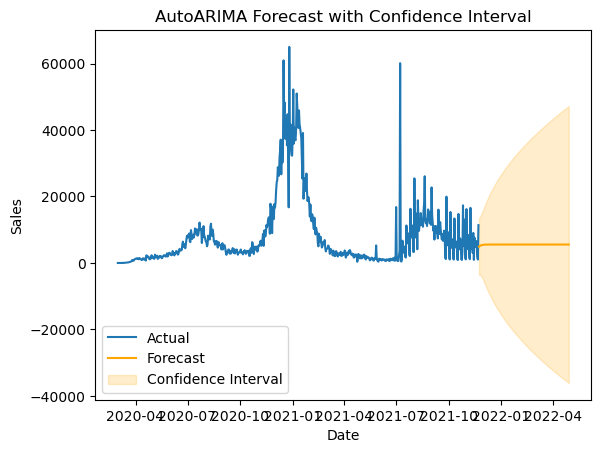

In [83]:
forecast_index = pd.date_range(train_data.index[-1], periods=n_periods + 1, freq=train_data.index.freq)[-n_periods:]

plt.plot(train_data.index, train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'], label='Actual')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [25]:
results=[]

for p in range(3,10):
    for q in range(3,10):
        for P in range(3,10):
            for Q in range(3,10):
                print(p,q,P,Q)
                model=sm.tsa.statespace.SARIMAX(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(p,1,q), seasonal_order=(P,1,Q,12)).fit()
                results.append([p,q,P,Q,model.aic])

3 3 3 3


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71914D+00    |proj g|=  1.60954D-01

At iterate    5    f=  9.70069D+00    |proj g|=  3.79094D-02

At iterate   10    f=  9.68990D+00    |proj g|=  2.77417D-02

At iterate   15    f=  9.68851D+00    |proj g|=  1.14259D-02

At iterate   20    f=  9.68838D+00    |proj g|=  8.11010D-04

At iterate   25    f=  9.68838D+00    |proj g|=  8.91580D-04

At iterate   30    f=  9.68835D+00    |proj g|=  3.09031D-03

At iterate   35    f=  9.68829D+00    |proj g|=  1.72529D-03

At iterate   40    f=  9.68824D+00    |proj g|=  3.18842D-03

At iterate   45    f=  9.68819D+00    |proj g|=  1.96128D-03

At iterate   50    f=  9.68816D+00    |proj g|=  1.36829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 3 3 4


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70113D+00    |proj g|=  1.24466D-01

At iterate    5    f=  9.69127D+00    |proj g|=  2.60652D-02

At iterate   10    f=  9.68983D+00    |proj g|=  1.26060D-02

At iterate   15    f=  9.68922D+00    |proj g|=  2.18802D-03

At iterate   20    f=  9.68889D+00    |proj g|=  1.89153D-02

At iterate   25    f=  9.68836D+00    |proj g|=  7.02971D-03

At iterate   30    f=  9.68826D+00    |proj g|=  9.50616D-04

At iterate   35    f=  9.68825D+00    |proj g|=  6.58546D-04

At iterate   40    f=  9.68825D+00    |proj g|=  1.77803D-04

At iterate   45    f=  9.68824D+00    |proj g|=  3.61312D-03


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.68822D+00    |proj g|=  1.53902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     65      1     0     0   1.539D-03   9.688D+00
  F =   9.6882173207461708     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
3 3 3 5


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70126D+00    |proj g|=  1.18197D-01

At iterate    5    f=  9.69165D+00    |proj g|=  2.31402D-02

At iterate   10    f=  9.69062D+00    |proj g|=  6.16079D-03

At iterate   15    f=  9.69019D+00    |proj g|=  1.79541D-02

At iterate   20    f=  9.68935D+00    |proj g|=  6.88009D-03

At iterate   25    f=  9.68830D+00    |proj g|=  3.89005D-03

At iterate   30    f=  9.68825D+00    |proj g|=  1.51358D-03

At iterate   35    f=  9.68824D+00    |proj g|=  4.95845D-04

At iterate   40    f=  9.68820D+00    |proj g|=  3.89586D-03

At iterate   45    f=  9.68748D+00    |proj g|=  4.30908D-02


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.68683D+00    |proj g|=  6.93311D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     62      1     0     0   6.933D-03   9.687D+00
  F =   9.6868288988193232     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
3 3 3 6


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.76028D+00    |proj g|=  1.74152D-01

At iterate    5    f=  9.71148D+00    |proj g|=  5.26052D-02

At iterate   10    f=  9.68845D+00    |proj g|=  1.45059D-02

At iterate   15    f=  9.68788D+00    |proj g|=  1.36708D-03

At iterate   20    f=  9.68786D+00    |proj g|=  2.55746D-03

At iterate   25    f=  9.68784D+00    |proj g|=  2.15356D-03

At iterate   30    f=  9.68774D+00    |proj g|=  7.31012D-03

At iterate   35    f=  9.68735D+00    |proj g|=  7.13154D-02

At iterate   40    f=  9.68636D+00    |proj g|=  1.55989D-02

At iterate   45    f=  9.68578D+00    |proj g|=  2.63802D-03


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.68571D+00    |proj g|=  1.56101D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     59      1     0     0   1.561D-03   9.686D+00
  F =   9.6857084930565591     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
3 3 3 7


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.76141D+00    |proj g|=  1.73350D-01

At iterate    5    f=  9.71101D+00    |proj g|=  5.56413D-02

At iterate   10    f=  9.68785D+00    |proj g|=  1.34873D-02


KeyboardInterrupt: 

In [ ]:
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')

df_results

In [ ]:
model = sm.tsa.statespace.SARIMAX(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(1, 1, 1),seasonal_order=(2,1,2,12))
results=model.fit()

train_data['forecast']=results.predict(start=90,end=103,dynamic=True)
train_data[['PEOPLE_POSITIVE_NEW_CASES_COUNT','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()